Lab Assignment 2
Floriana Lawrence - 220016876
Part 6: K-means - DBSCAN Clustering

Task 1: Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pip install lonboard

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer, SolidPolygonLayer


Task 1:

In [ ]:
#I first downloaded the data
chicago_df=gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Lab Assignment 2/chicago_parcels/Chicago_parcels.shp')

Task 2

In [ ]:
chicago_df.head(5)

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...

Task 3

In [ ]:
#I then used SolidPolygonLayer to create a map of the data
layer = SolidPolygonLayer.from_geopandas(chicago_df, get_fill_color=[255,0,0])
m= Map(layer)
m

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(custom_attribution='', layers=(SolidPolygonLayer(get_fill_color=[255, 0, 0], table=arro3.core.Table
------…

Task 4

In [ ]:
chicago_df['centroid'] = chicago_df.geometry.centroid
chicago_df['latitude'] = chicago_df['centroid'].y

In [ ]:
chicago_df['centroid'] = chicago_df.geometry.centroid
chicago_df['longitude'] = chicago_df['centroid'].x

In [86]:
correlation_matrix = chicago_df.corr(numeric_only=True)


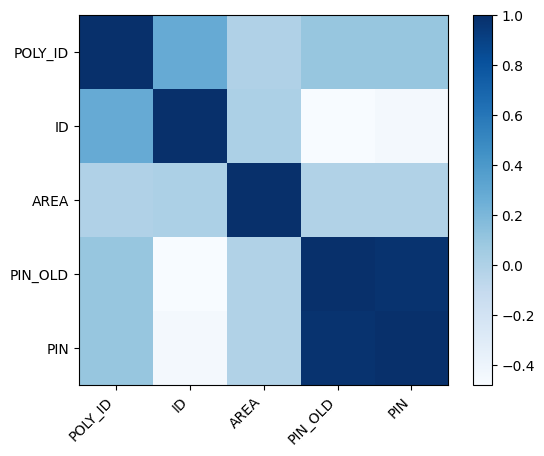

In [87]:
plt.imshow(correlation_matrix, cmap='Blues')
plt.colorbar()

variables = []
for i in correlation_matrix.columns:
    variables.append(i)

plt.xticks(range(len(correlation_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix)), variables)

plt.show()


There is a positive correlation betweeen PIN old and PIN, this could indicate that the older properities may be missing cooridnates, and so they align with the current PIN instead.


Task 5: K-Means Clustering

In [ ]:
data = chicago_df
geometry = gpd.points_from_xy(chicago_df['longitude'], chicago_df['latitude'])
gdf = gpd.GeoDataFrame(chicago_df, geometry=geometry)

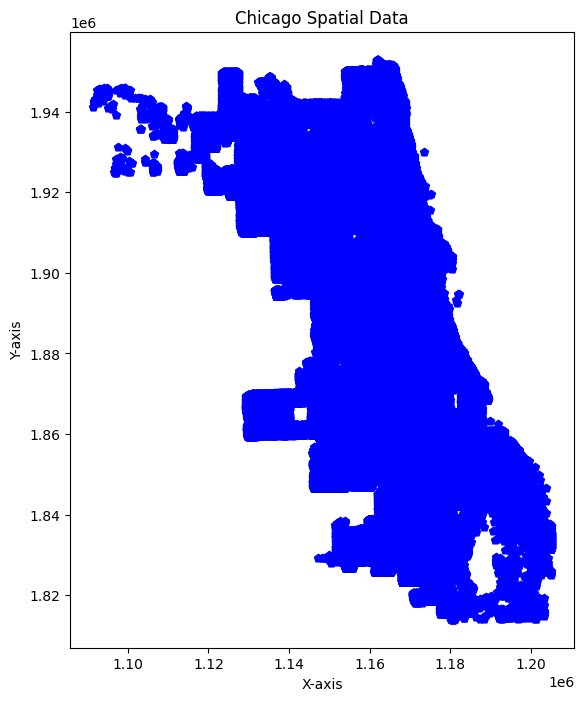

In [ ]:
gdf.plot(marker='p', color='blue', figsize=(8, 8))
plt.title('Chicago Spatial Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

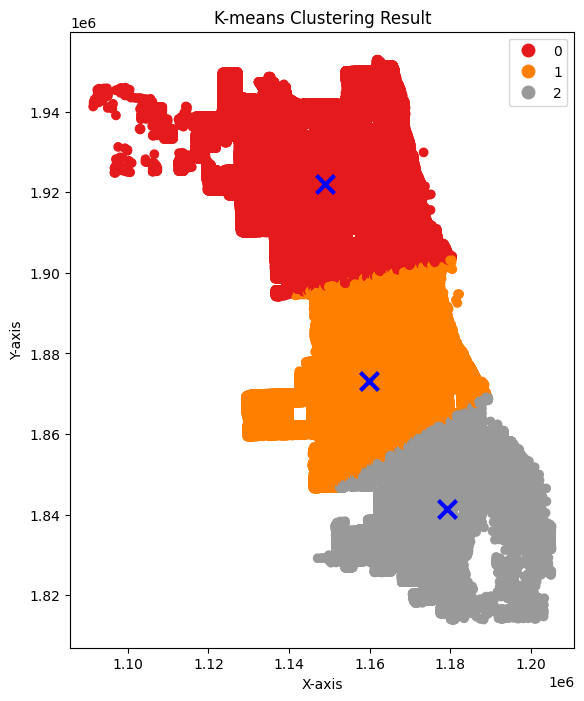

In [ ]:
# I first created a kmeans with a n_cluster value of 3
kmeans = KMeans(n_clusters=3, random_state=42)
gdf['kmeans_cluster'] = kmeans.fit_predict(gdf[['longitude', 'latitude']])
gdf.plot(column='kmeans_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()



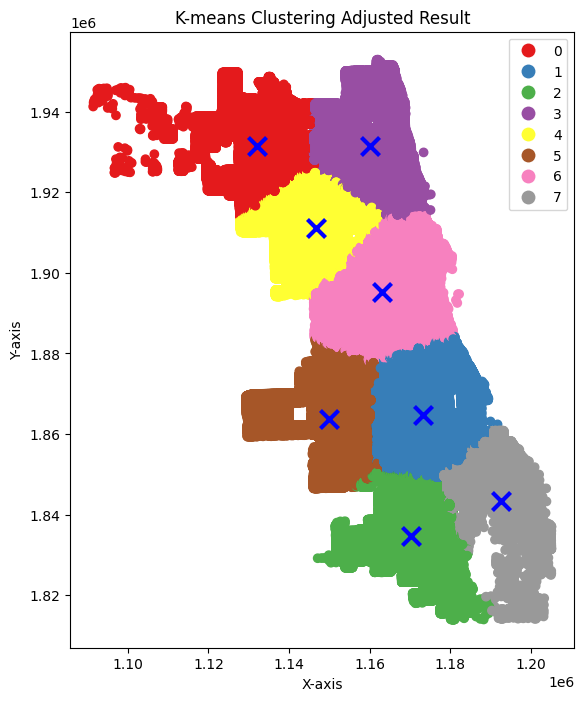

In [ ]:
#I then made another one with n_cluster value of 8
kmeans_adjusted = KMeans(n_clusters=8, random_state=42)
chicago_df['kmeans_cluster_adjusted'] = kmeans_adjusted.fit_predict(chicago_df[['longitude', 'latitude']])

gdf['kmeans_cluster_adjusted'] = kmeans_adjusted.fit_predict(gdf[['longitude', 'latitude']])
gdf.plot(column='kmeans_cluster_adjusted', categorical=True, legend=True, figsize=(8, 8), cmap='Set1')

centroids = kmeans_adjusted.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="b",
    zorder=10,
)
plt.title('K-means Clustering Adjusted Result')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Task 6

In [ ]:
#I first made a map layer to input the clustering results onto
layer_1 = SolidPolygonLayer.from_geopandas(chicago_df)
map_1 = Map(layers=[layer_1], _height=400)
map_1

In [ ]:
# I repeated this process to try a new n_cluster value
chicago_df['centroid'] = chicago_df['centroid'].apply(lambda geom: geom.wkt)

layer_2 = SolidPolygonLayer.from_geopandas(chicago_df)
map_2 = Map(layers=[layer_2], _height=400)
map_2

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(custom_attribution='', layers=(SolidPolygonLayer(table=arro3.core.Table
-----------
POLY_ID: UInt32
ID: UI…

In [ ]:
#I then I filled in the catergories with colours that indicated the different clustering
categories_kmeans = chicago_df['kmeans_cluster'].unique()
colors_kmeans = sns.color_palette("bright", len(categories_kmeans))
color_dict_kmeans = dict(zip(categories_kmeans, colors_kmeans))
color_array_kmeans = np.array([tuple(np.append(np.multiply(color_dict_kmeans.get(x, (0, 0, 0)), 255).astype(int), 255)) for x in chicago_df['kmeans_cluster']], dtype=np.uint8)
layer_1.radius_scale = 50
layer_1.opacity = 0.05
layer_1.get_fill_color = color_array_kmeans

In [ ]:
categories_kmeans = chicago_df['kmeans_cluster_adjusted'].unique()
colors_kmeans = sns.color_palette("dark", len(categories_kmeans))
color_dict_kmeans = dict(zip(categories_kmeans, colors_kmeans))
color_array_kmeans = np.array([tuple(np.append(np.multiply(color_dict_kmeans.get(x, (0, 0, 0)), 255).astype(int), 255)) for x in chicago_df['kmeans_cluster_adjusted']], dtype=np.uint8)
layer_2.radius_scale = 50
layer_2.opacity = 0.05
layer_2.get_fill_color = color_array_kmeans

Task 7:

I think that the more 'optimal' value for the n_cluster is '8', as it divides up Chicago more which allows for better analysis and comparsion of the tax parcels within different areas, such as the coast versus the centre.

Task 8: DBSCAN Clustering

In [ ]:
def find_neighbors(chicago_df, point_index, epsilon):
    # Find indices of data points within epsilon distance from the given point
    distances = np.linalg.norm(chicago_df - chicago_df[point_index], axis=1)
    neighbors = np.where(distances <= epsilon)[0]
    return neighbors
    print(find_neighbours)

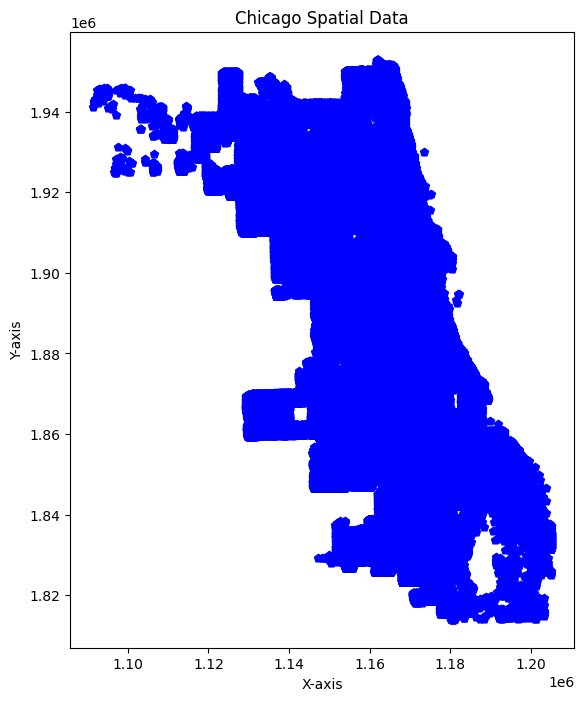

In [ ]:
data = chicago_df
geometry = gpd.points_from_xy(chicago_df['longitude'], chicago_df['latitude'])
gdf = gpd.GeoDataFrame(chicago_df, geometry=geometry)

gdf.plot(marker='p', color='blue', figsize=(8, 8))
plt.title('Chicago Spatial Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

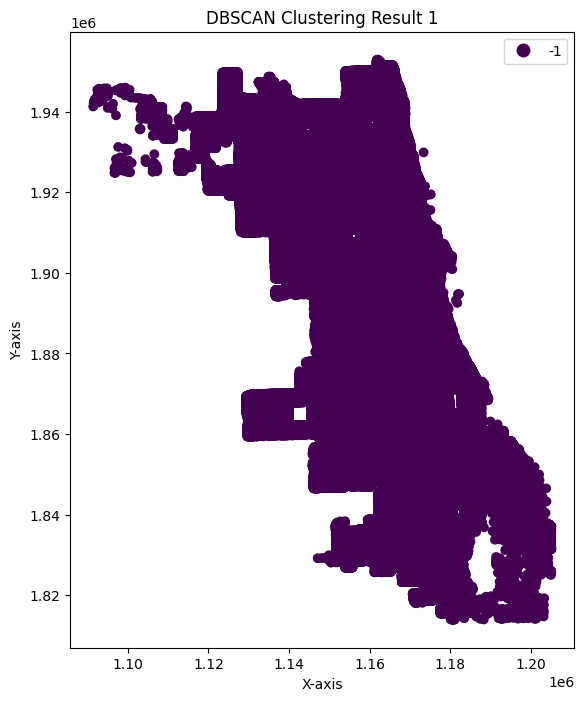

In [ ]:
data = chicago_df
geometry = gpd.points_from_xy(chicago_df['longitude'], chicago_df['latitude'])
gdf2 = gpd.GeoDataFrame(chicago_df, geometry=geometry)

dbscan = DBSCAN(eps=0.5, min_samples=3)
gdf2['dbscan_cluster'] = dbscan.fit_predict(gdf2[['longitude', 'latitude']])

# Visualize DBSCAN clustering result
gdf2.plot(column='dbscan_cluster', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')
plt.title('DBSCAN Clustering Result 1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

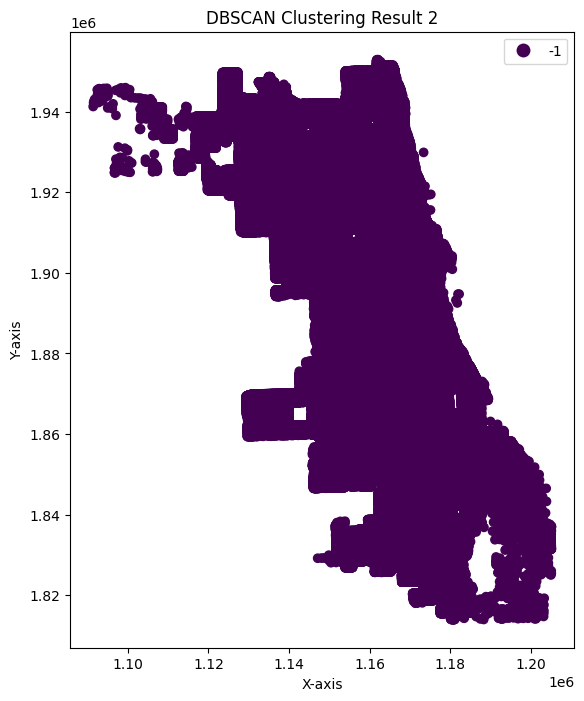

In [ ]:
data = chicago_df
geometry = gpd.points_from_xy(chicago_df['longitude'], chicago_df['latitude'])
gdf3 = gpd.GeoDataFrame(chicago_df, geometry=geometry)


dbscan = DBSCAN(eps=1.0, min_samples=5)
gdf3['dbscan_cluster_1'] = dbscan.fit_predict(gdf3[['longitude', 'latitude']])

# Visualize DBSCAN clustering result
gdf3.plot(column='dbscan_cluster_1', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')
plt.title('DBSCAN Clustering Result 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

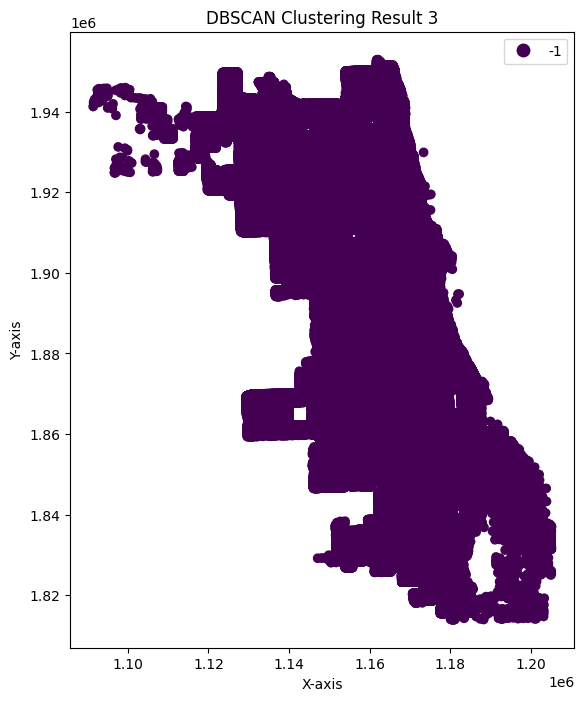

In [ ]:
data = chicago_df
geometry = gpd.points_from_xy(chicago_df['longitude'], chicago_df['latitude'])
gdf4 = gpd.GeoDataFrame(chicago_df, geometry=geometry)

dbscan = DBSCAN(eps=1.5, min_samples=7)
gdf4['dbscan_cluster_2'] = dbscan.fit_predict(gdf4[['longitude', 'latitude']])

# Visualize DBSCAN clustering result
gdf4.plot(column='dbscan_cluster_2', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')
plt.title('DBSCAN Clustering Result 3')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

Task 9

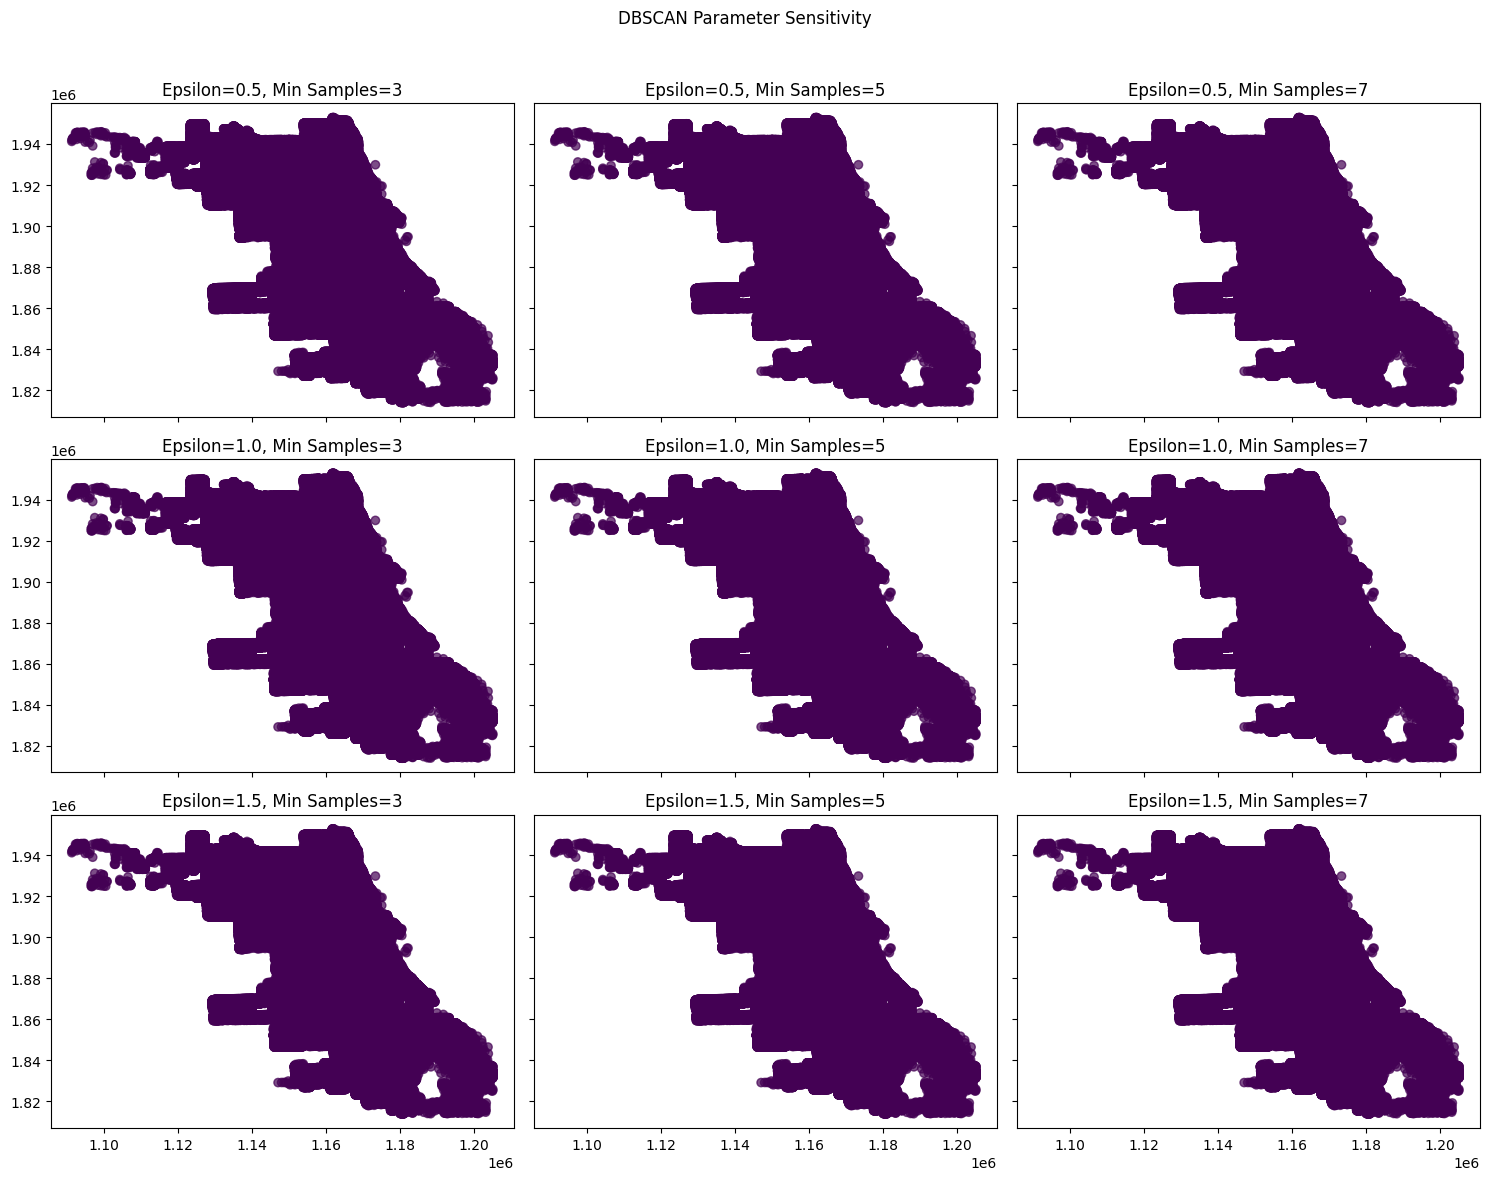

In [ ]:
def visualize_dbscan_parameters(chicago_df, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 12), sharex=True, sharey=True)
    fig.suptitle('DBSCAN Parameter Sensitivity')

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            clusters_result = dbscan.fit_predict(chicago_df[['longitude', 'latitude']])
            axes[i, j].scatter(chicago_df['longitude'], chicago_df['latitude'], c=clusters_result, cmap='viridis', alpha=0.7)
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

epsilon_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5, 7]

visualize_dbscan_parameters(chicago_df, epsilon_values, min_samples_values)

Task 10

Although I was unable to demonstrate this myself,
modifying the eps and min_samples parameters in DBSCAN can significantly impact the clustering results.

The eps defines the maximum distance allowed around two points within a cluster. A larger eps can merge more points into a single cluster, which can lead to combining distinct clusters into one.

Min_samples determines the minimum number of points required to form a cluster. A higher min_samples value means that more points are needed to form a cluster, which can result in less and bigger clusters.


